In [16]:
# PCA for dimensionality reduction
import numpy as np
import matplotlib.pyplot as plt


X = np.load('olivetti_faces.npy')                 # loading olivetti_faces dataset
shape = X.shape

X = X.reshape((shape[0], shape[1] * shape[2]))    # Reshaping each image as a vector

# mean centering
mean_X = np.mean(X, axis = 0)
X = X - mean_X

S = np.cov(X.T)                                    # Covariance calculation
# S = np.cov(X, rowvar = False)


In [10]:
e_values, e_vectors = np.linalg.eig(S)             # eigenvalues and eigenvectors calculation


sorted_index = np.argsort(e_values)[::-1]          
e_values = e_values[sorted_index]                  # Sorting the eigenvalues
e_vectors = e_vectors[:,sorted_index]              # Sorting the eigenvectors


e_values = np.real(e_values)                       # convert to real values (we can also use absolute instead of real)
e_vectors = np.real(e_vectors)
e_values = np.where(e_values<0, 0, e_values)

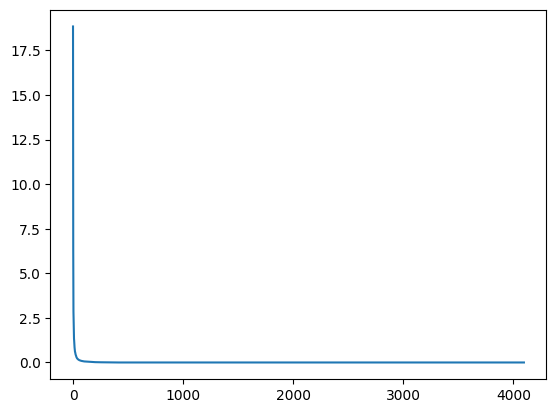

In [17]:
# plot eigen values
plt.plot(np.arange(len(e_values)), e_values)
plt.show()

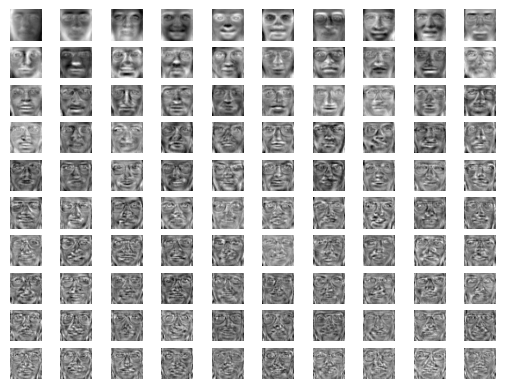

In [18]:
# print first few eigen faces
for i in range(1, 101):
    plt.subplot(10, 10, i)
    plt.axis('off')
    plt.imshow(e_vectors[:, i].reshape(shape[1], shape[2]), cmap = 'gray')
plt.show()

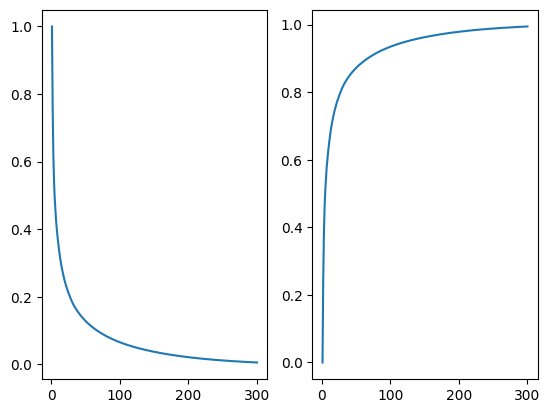

In [19]:

# variance preserved and error
d = 300
eig_sum = np.sum(e_values)

residual_error = np.zeros(d)
var_preserved = np.zeros(d)

for i in range(d):
    residual_error[i] = np.sum(e_values[i:])/eig_sum
    var_preserved[i] = np.sum(e_values[:i])/eig_sum

plt.subplot(121)
plt.plot(np.arange(1, d+1), residual_error)
plt.subplot(122)
plt.plot(np.arange(1, d+1), var_preserved)
plt.show()

In [20]:
e_vec_subset = e_vectors[:, :d]

# Image Compression
X_dim_red = np.matmul(X, e_vec_subset)                   # Dimensionality reduction from 4096 to 300

# Reconstructed images
X_rec = np.matmul(X_dim_red, e_vec_subset.T) + mean_X

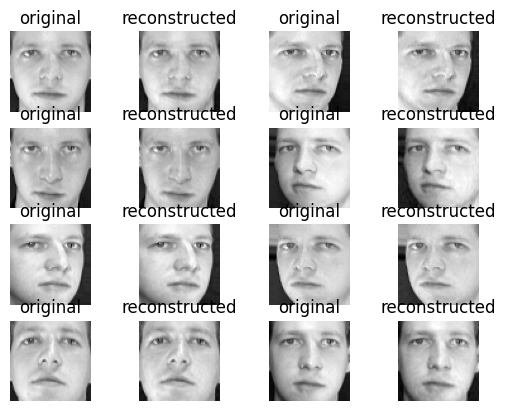

In [21]:

X = X + mean_X
# print original and reconstructed images
for i in range(1, 17):
    if i % 2 !=0:
        plt.subplot(4, 4, i)
        plt.axis('off')
        plt.title('original')
        plt.imshow(X[i//2].reshape(64, 64), cmap = 'gray')
    else:
        plt.subplot(4, 4, i)
        plt.axis('off')
        plt.title('reconstructed')
        plt.imshow(X_rec[(i-1)//2].reshape(64, 64), cmap = 'gray')
plt.show()